# Vector autoregression modeling

[python statsmodel package documentation](http://www.statsmodels.org/dev/vector_ar.html)

documentation for this package follows the notation of [Lutkepohl2005](../Data/BackgroundLiterature/Lutkepohl_2005.pdf)

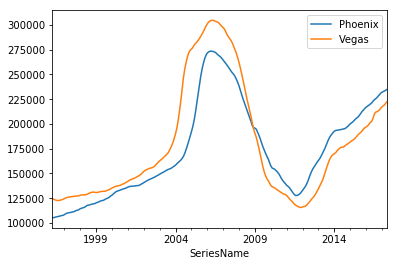

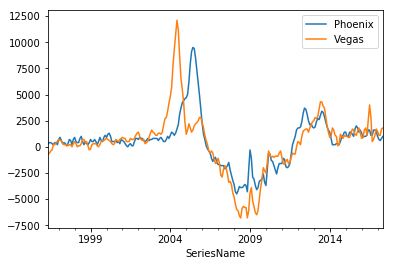

In [2]:
%reset -f
%matplotlib inline

import numpy as np
import pandas as pd

df = pd.read_csv('../Data/ZHVI/VAR_test6.csv',index_col=0)
df.index = pd.DatetimeIndex(df.index)
data = df[['Phoenix','Vegas']]

data.plot()

#Peform first order differencing

data = data.diff().dropna()
data.plot()


# Idea - Vegas may be leading indicator of Phoenix prices

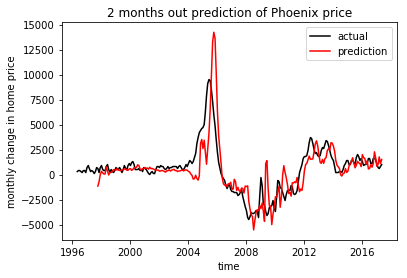

In [37]:
%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from statsmodels.tsa.api import VAR, DynamicVAR

#warnings.filterwarnings('ignore')

df = pd.read_csv('../Data/ZHVI/VAR_test6.csv',index_col=0)
df.index = pd.DatetimeIndex(df.index)
data = df[['Phoenix','Vegas']]

# The VAR class assumes that the passed time series are stationary.
# Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. 

#Peform first order differencing

data = data.diff().dropna()
#data.plot()

#Create VAR model object 
model = VAR(data)

#Determine / manually specify VAR order 

#model.select_order(15) #Max VAR order

p = 4

results = model.fit(p)

# Forecasts out to 6 months

results.forecast(data.values[-p:],6)

#results.test_causality('Phoenix', 'Vegas', kind='f')

var = DynamicVAR(data, lag_order=4, window_type='expanding')
#print(var.coefs.)
fc=var.forecast(4)
ph1,=plt.plot(data.Phoenix.index,data.Phoenix.values,c='black')
ph2,=plt.plot(fc.Phoenix.index,fc.Phoenix.values,c='red')
plt.xlabel('time')
plt.ylabel('monthly change in home price')
plt.legend([ph1,ph2],['actual','prediction'])
plt.title('2 months out prediction of Phoenix price')




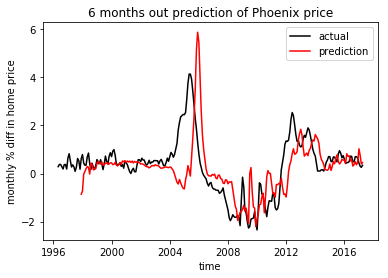

In [3]:
%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from statsmodels.tsa.api import VAR, DynamicVAR

warnings.filterwarnings('ignore')

df = pd.read_csv('../Data/ZHVI/VAR_test6.csv',index_col=0)
df.index = pd.DatetimeIndex(df.index)
data = df[['Phoenix','Vegas']]

# The VAR class assumes that the passed time series are stationary.
# Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. 

#Peform first order differencing

data2 = data.diff().dropna()
data3 = (data2/data[:-1])*100
data3 = data3.dropna()

var = DynamicVAR(data3, lag_order=4, window_type='expanding')
fc=var.forecast(6)
ph1,=plt.plot(data3.Phoenix.index,data3.Phoenix.values,c='black')
ph2,=plt.plot(fc.Phoenix.index,fc.Phoenix.values,c='red')
plt.xlabel('time')
plt.ylabel('monthly % diff in home price')
plt.legend([ph1,ph2],['actual','prediction'])
plt.title('6 months out prediction of Phoenix price')


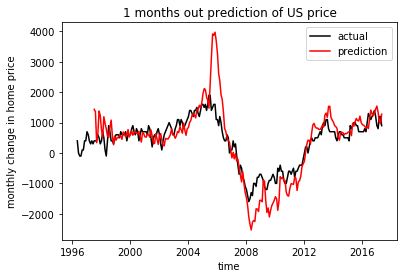

In [27]:
%reset -f
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from statsmodels.tsa.api import VAR, DynamicVAR

#warnings.filterwarnings('ignore')

df = pd.read_csv('../Data/ZHVI/VAR_test6.csv',index_col=0)
df.index = pd.DatetimeIndex(df.index)
data = df[['Phoenix','UnitedStates']]

# The VAR class assumes that the passed time series are stationary.
# Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. 

#Peform first order differencing

data = data.diff().dropna()
#data.plot()

#Create VAR model object 
model = VAR(data)

#Determine / manually specify VAR order 

#model.select_order(15) #Max VAR order

p = 4

results = model.fit(p)

# Forecasts out to 6 months

results.forecast(data.values[-p:],6)

#results.test_causality('Phoenix', 'Vegas', kind='f')

var = DynamicVAR(data, lag_order=4, window_type='expanding')
#print(var.coefs.)
fc=var.forecast(1)
ph1,=plt.plot(data.UnitedStates.index,data.UnitedStates.values,c='black')
ph2,=plt.plot(fc.UnitedStates.index,fc.UnitedStates.values,c='red')
plt.xlabel('time')
plt.ylabel('monthly change in home price')
plt.legend([ph1,ph2],['actual','prediction'])
plt.title('1 months out prediction of US price')